
# The analysis includes:
- Dataset loading
- Class-wise statistics
- Image resolution and aspect ratio analysis
- Color space analysis
- Pixel value analysis
- Dataset integrity checks
- Visualization of sample images


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

 Loading the Dataset


In [3]:
base_path = "PlantVillage"
train_path = os.path.join(base_path, "train")
val_path = os.path.join(base_path, "val")


 Dataset Statistics
    this includes 
        number of classes,
        number of images.

In [4]:
classes = os.listdir(train_path)
num_classes = len(classes)
total_images = 0
class_counts = {}
for cls in classes:
    cls_path = os.path.join(train_path, cls)
    count = len(os.listdir(cls_path))
    class_counts[cls] = count
    total_images += count
print("Number of classes:", num_classes)
print("Total images (train):", total_images)


Number of classes: 38
Total images (train): 43444


Class-wise Image Count


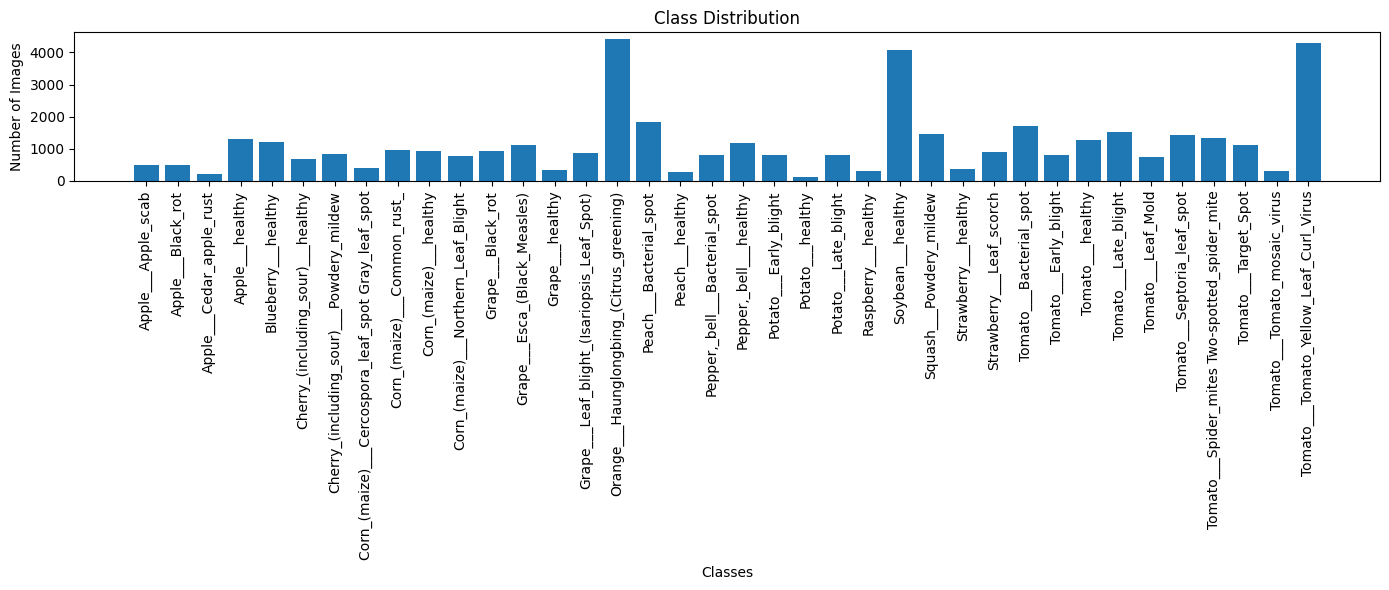

In [5]:
plt.figure(figsize=(14,6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.tight_layout()
plt.show()


Image Height & Width Analysis


In [6]:
widths, heights, aspect_ratios = [], [], []
for cls in classes:
    cls_path = os.path.join(train_path, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path)
        w, h = img.size
        widths.append(w)
        heights.append(h)
        aspect_ratios.append(w / h)


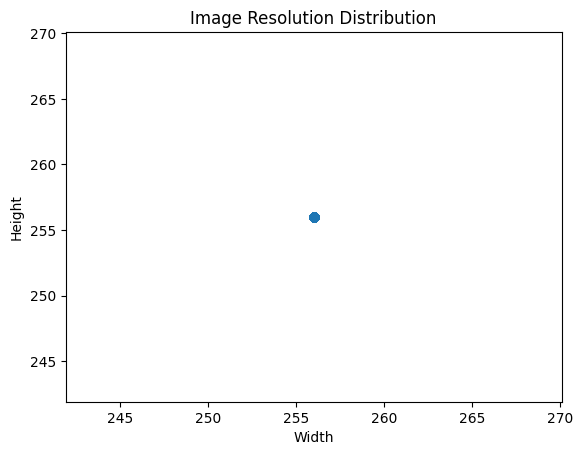

In [7]:
plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Resolution Distribution")
plt.show()


 Unique Image Resolutions


In [ ]:

resolution_counts = Counter(zip(widths, heights))
for res, count in resolution_counts.items():
    print(res, ":", count)



(256, 256) : 43444


Aspect Ratio Analysis

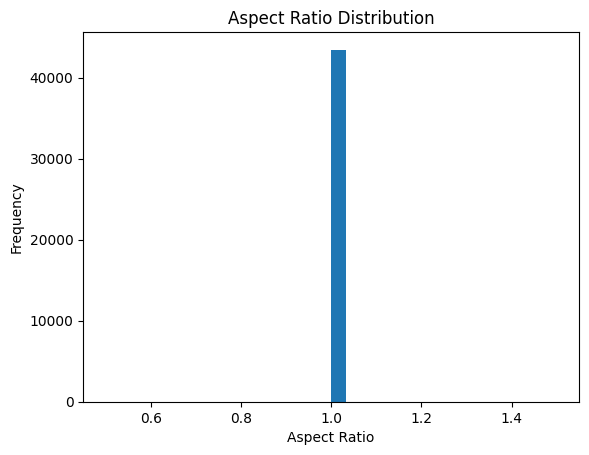

In [ ]:
plt.hist(aspect_ratios, bins=30)
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.title("Aspect Ratio Distribution")
plt.show()


Pixel Value Range Analysis

In [17]:
min_pixel, max_pixel = 255, 0

for cls in classes:
    cls_path = os.path.join(train_path, cls)
    for img_name in os.listdir(cls_path):
        img = np.array(Image.open(os.path.join(cls_path, img_name)))
        min_pixel = min(min_pixel, img.min())
        max_pixel = max(max_pixel, img.max())

print("Pixel range:", min_pixel, "to", max_pixel)


Pixel range: 0 to 255


Color Space Analysis (BGR to RGB)

In [18]:
sample_class = os.listdir(train_path)[0]
sample_image = os.listdir(os.path.join(train_path, sample_class))[0]
image_path = os.path.join(train_path, sample_class, sample_image)
img_pil = Image.open(image_path)
print("Image mode (PIL):", img_pil.mode)
print("Image size:", img_pil.size)


Image mode (PIL): RGB
Image size: (256, 256)


Dataset Integrity Checks


In [21]:

empty_classes = [cls for cls in classes if len(os.listdir(os.path.join(train_path, cls))) == 0]
print("Empty classes:", empty_classes)
print("Train and Val classes match:",
      sorted(os.listdir(train_path)) == sorted(os.listdir(val_path)))


Empty classes: []
Train and Val classes match: True


Corrupted Image Check

In [22]:
corrupted = []

for cls in classes:
    cls_path = os.path.join(train_path, cls)
    for img_name in os.listdir(cls_path):
        try:
            img = Image.open(os.path.join(cls_path, img_name))
            img.verify()
        except:
            corrupted.append(img_name)
print("Corrupted images:", len(corrupted))


Corrupted images: 0


 Sample Image Visualization


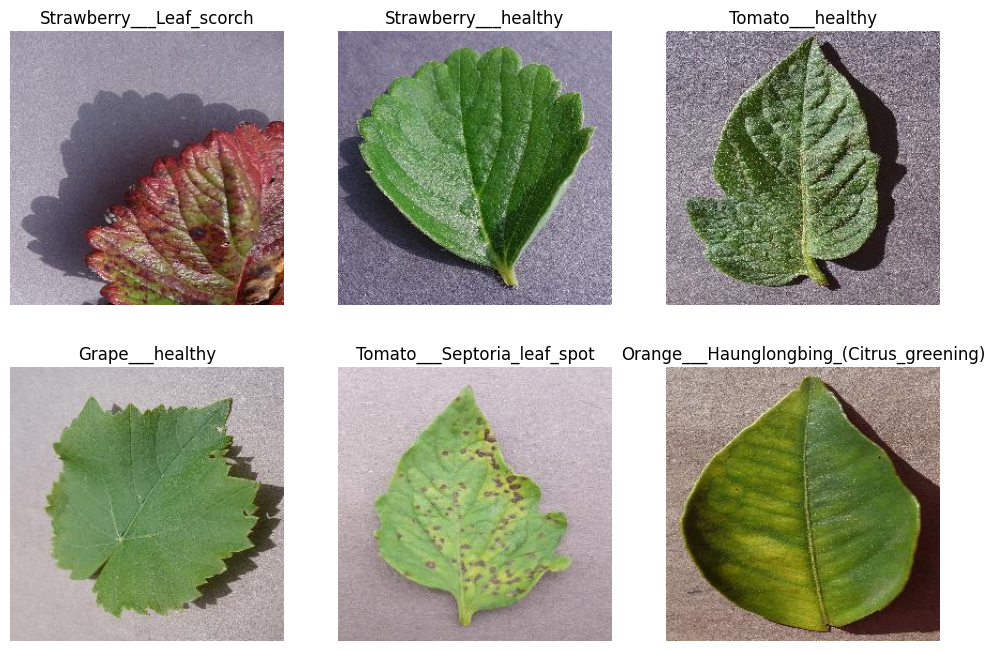

In [23]:
plt.figure(figsize=(12,8))
sample_classes = random.sample(classes, 6)
for i, cls in enumerate(sample_classes):
    img_name = random.choice(os.listdir(os.path.join(train_path, cls)))
    img = Image.open(os.path.join(train_path, cls, img_name))
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
plt.show()
